In [24]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [25]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea']) # Above ground living area in SqFt
houseSalePrice = pd.DataFrame(houseData['SalePrice']) # Sale Price of house in US Dollars

houseGrLivArea.info()
print()
houseSalePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


### 1. Plot house SalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship. 
#### Remember the correlation coefficient between these two variables from the last Example Class? Check again.

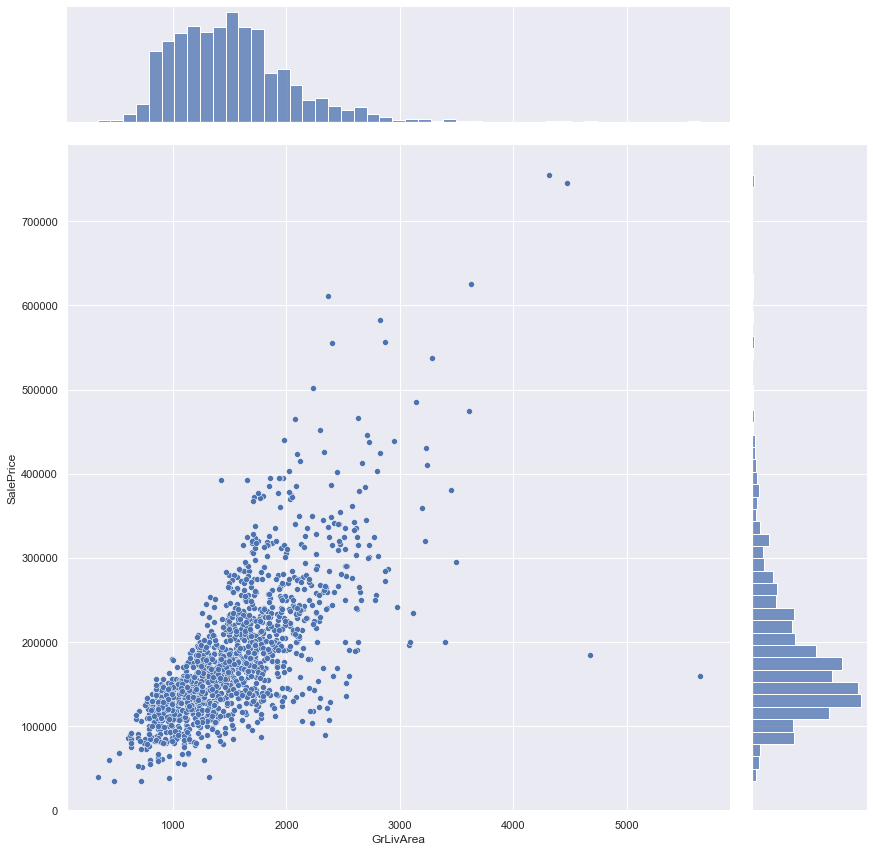

In [27]:
# Create a joint dataframe by concatenating the two variables
houseDF = pd.concat([houseGrLivArea, houseSalePrice], axis = 1)

# Jointplot of Abv ground living area against Sale Price of house
# Must use exact column name from houseDF
sb.jointplot(data = houseDF, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

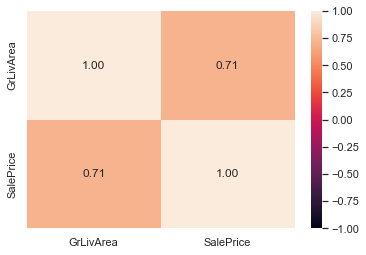

In [28]:
# Calculate the correlation between the two columns/variables
sb.heatmap(houseDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### 2. Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [29]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Regression with Random Train-Test Split
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

### 4. Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.
#### Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)
#### Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)

In [30]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseGrLivArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape) # 1100
print("Test Set  :", X_test.shape, y_test.shape) # 360

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### 4. Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

In [31]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

### 5. Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a     Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line

In [32]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [24255.10424903]
Coefficients of Regression 	: a =  [[103.02190216]]



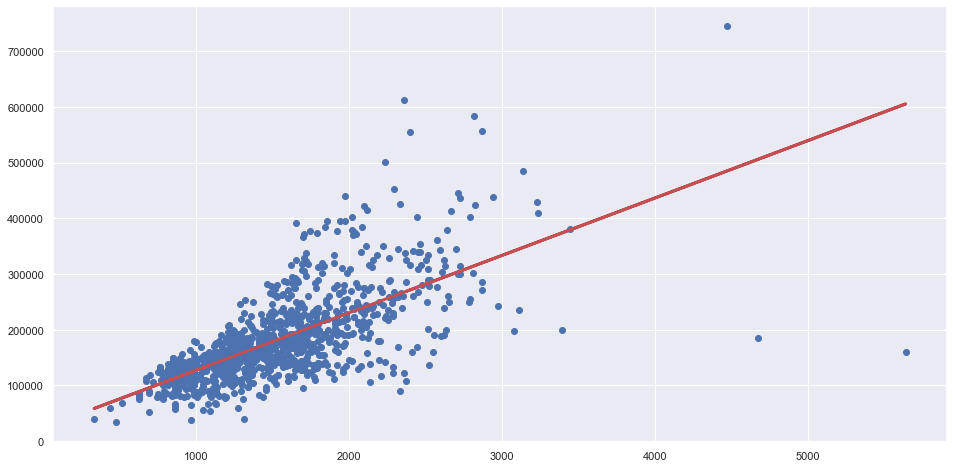

In [33]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

### 6. Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.

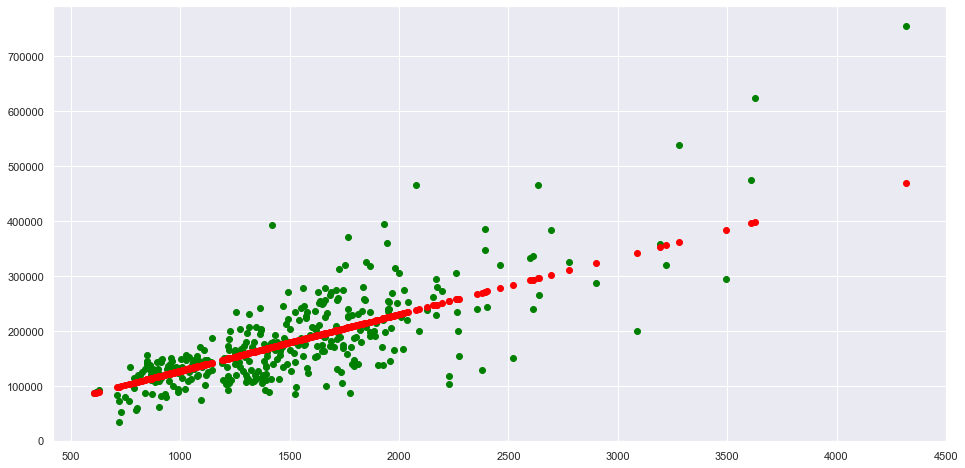

In [35]:
# Predict Total values corresponding to HP Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

### Problem 2 : Predicting SalePrice using Other Variables

---

> Perform all the above steps on 'SalePrice' against each of the variables 'LotArea', 'TotalBsmtSF', 'GarageArea' one-by-one to perform individual Linear Regressions. 

> Discuss with your Friends about the models, compare and contrast the Explained Variance (R^2), check the predictions, and determine which model is the best to predict 'SalePrice'

In [31]:
# Create DF before splitting

houseSalePrice = pd.DataFrame(houseData['SalePrice'])
houseLotArea = pd.DataFrame(houseData['LotArea'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
houseGarageArea = pd.DataFrame(houseData['GarageArea'])

In [48]:
# LotArea

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseLotArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape) # 1100
print("Test Set  :", X_test.shape, y_test.shape) # 360

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


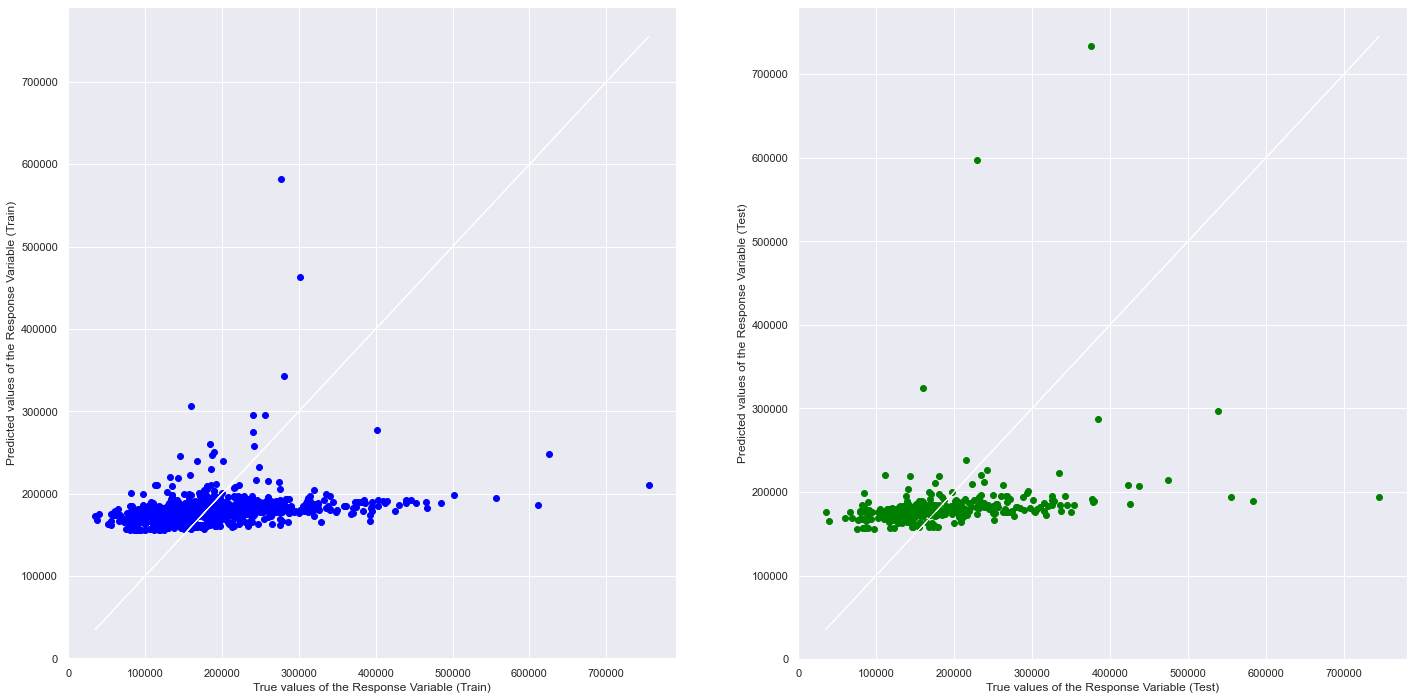

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07375290166382709
Mean Squared Error (MSE) 	: 5553536810.515495

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.034518727151619855
Mean Squared Error (MSE) 	: 6977437035.930892



In [49]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)


# LotArea against SalePrice
# Predict Response corresponding to Predictors

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [54]:
# TotalBsmtSF

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseTotalBsmtSF, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape) # 1100
print("Test Set  :", X_test.shape, y_test.shape) # 360

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


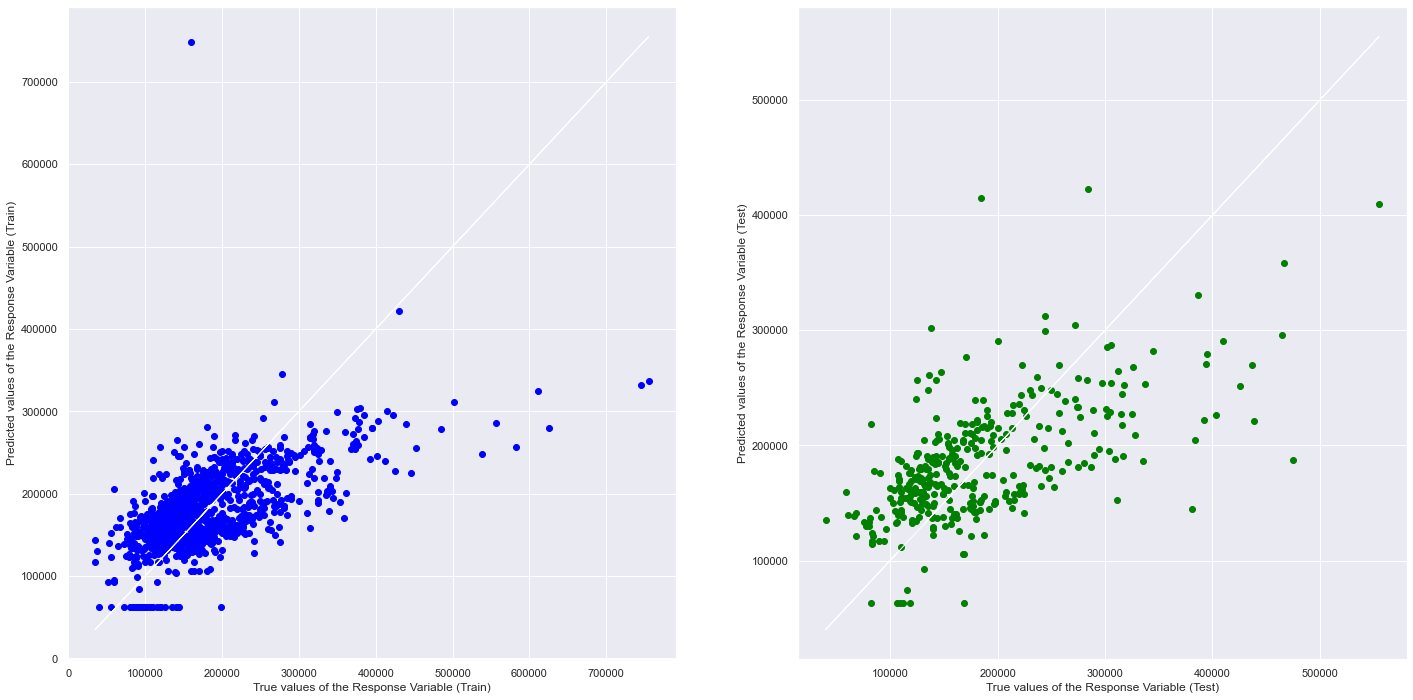

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37792425436060495
Mean Squared Error (MSE) 	: 3890032608.0665536

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37151015478596827
Mean Squared Error (MSE) 	: 4063397960.6887016



In [55]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)


# LotArea against SalePrice
# Predict Response corresponding to Predictors

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [56]:
# GarageArea

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseGarageArea, houseSalePrice, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape) # 1100
print("Test Set  :", X_test.shape, y_test.shape) # 360

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


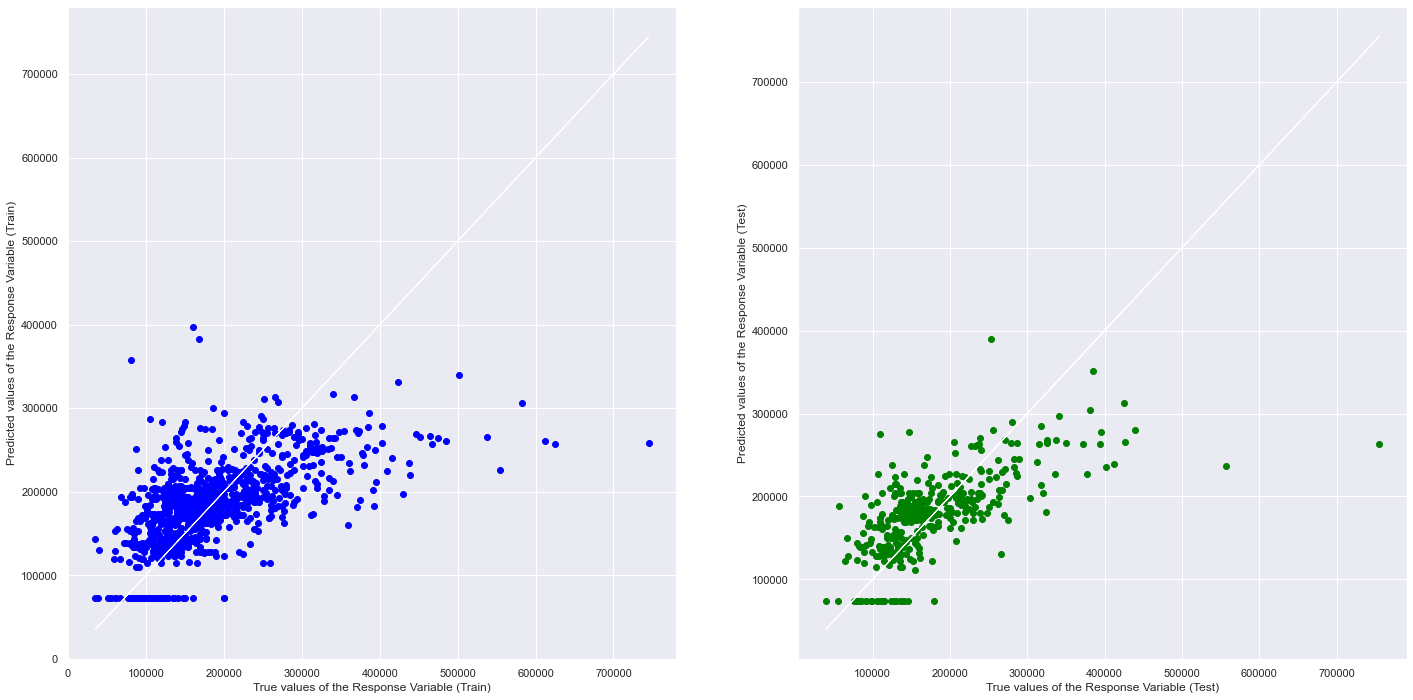

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37032836362837074
Mean Squared Error (MSE) 	: 3949637341.397914

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4424060326645658
Mean Squared Error (MSE) 	: 3570531463.761454



In [57]:
# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)


# GarageArea against SalePrice
# Predict Response corresponding to Predictors

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()